In [144]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [145]:
df = pd.read_excel("Standarded_Data_Format.xlsx")

In [146]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [147]:
df_data = df.copy()

In [148]:
df_data.head(1)

,it,ft,bt,km,transmission,ownerno,oem,model,modelyear,centralvariantid,variantname,price,trendingtext.imgurl,trendingtext.heading,trendingtext.desc,registration_year,insurance_validity,seats,rto,power_steering,power_windows_front,air_conditioner,heater,adjustable_head_lights,manually_adjustable_exterior_rear_view_mirror,centeral_locking,child_safety_locks,power_windows_rear,remote_trunk_opener,remote_fuel_lid_opener,low_fuel_warning_light,accessory_power_outlet,vanity_mirror,rear_seat_headrest,cup_holders_front,digital_odometer,electronic_multi_tripmeter,fabric_upholstery,glove_compartment,digital_clock,wheel_covers,power_antenna,chrome_grille,day_night_rear_view_mirror,passenger_side_rear_view_mirror,halogen_headlamps,rear_seat_belts,door_ajar_warning,side_impact_beams,front_impact_beams,adjustable_seats,centrally_mounted_fuel_tank,engine_immobilizer,anti_theft_device,fog_lights_front,anti_lock_braking_system,cd_player,trunk_light,multifunction_steering_wheel,navigation_system,smart_access_card_entry,engine_start_stop_button,gear_shift_indicator,luggage_hook_and_net,adjustable_steering,tachometer,leather_steering_wheel,outside_temperature_display,height_adjustable_driver_seat,power_adjustable_exterior_rear_view_mirror,electric_folding_rear_view_mirror,rear_window_wiper,rear_window_washer,rear_window_defogger,alloy_wheels,integrated_antenna,outside_rear_view_mirror_turn_indicators,roof_rail,power_door_locks,driver_air_bag,passenger_air_bag,seat_belt_warning,keyless_entry,engine_check_warning,crash_sensor,ebd,follow_me_home_headlamps,rear_camera,speed_sensing_auto_door_lock,pretensioners_and_force_limiter_seatbelts,impact_sensing_auto_door_lock,no_of_airbags,radio,speakers_front,speakers_rear,integrated2din_audio,usb_auxiliary_input,bluetooth,touch_screen,number_of_speaker,glove_box_cooling,driving_experience_control_eco,tinted_glass,rear_spoiler,chrome_garnish,vehicle_stability_control_system,rear_reading_lamp,rear_seat_centre_arm_rest,cup_holders_rear,rear_acvents,air_quality_control,height_adjustable_front_seat_belts,cruise_control,voice_control,audio_system_remote_control,leather_seats,fog_lights_rear,traction_control,seat_lumbar_support,battery_saver,lane_change_indicator,sun_roof,automatic_driving_lights,anti_theft_alarm,automatic_head_lamps,isofix_child_seat_mounts,hill_assist,tailgate_ajar,brake_assist,steering_wheel_gearshift_paddles,ledtaillights,cigarette_lighter,rain_sensing_wiper,drive_modes,active_noise_cancellation,adjustable_headrest,hands_free_tailgate,dual_tone_dashboard,leather_wrap_gear_shift_selector,dual_tone_body_colour,leddrls,ledheadlights,cornering_headlamps,cornering_foglamps,side_air_bag_front,side_air_bag_rear,tyre_pressure_monitor,clutch_lock,anti_pinch_power_windows,knee_airbags,apple_car_play,android_auto,mirror_link,wireless_phone_charging,compass,moon_roof,projector_headlamps,speed_alert,eletronic_stability_control,touch_screen_size,xenon_headlamps,cd_changer,power_boot,rear_folding_table,smoke_headlamps,dvd_player,internal_storage,rear_entertainment_system,remote_engine_start_stop,ventilated_seats,ledfog_lamps,view360camera,geo_fence_alert,steering_mounted_tripmeter,remote_climate_control,remote_horn_light_control,heated_wing_mirror,side_stepper,blind_spot_monitor,hill_descent_control,heads_up_display,sos_emergency_assistance,cassette_player,find_my_car_location,wifi_connectivity,headlamp_washers,real_time_vehicle_tracking,roof_carrier,smart_key_band,lane_watch_camera,removable_convertible_top,power_folding3rd_row_seat,mileage,max_power,torque,color,engine_type,displacement,no_of_cylinder,values_per_cylinder,value_configuration,fuel_suppy_system,turbo_charger,super_charger,length,width,height,wheel_base,front_tread,rear_tread,kerb_weight,gross_weight,gear_box,drive_type,steering_type,turning_radius,front_brake_type,rear_brake_type,top_speed,tyre_type,no_door_numbers,cargo_volumn,wheel_size,ground_clearance_unladen,car_links,city,gears,power_value,color_group
0,0,petrol,hatchback,120000,manual,

In [149]:
df_data.nunique()

it                                                  1
ft                                                  5
bt                                                 10
km                                               4090
transmission                                        2
ownerno                                             6
oem                                                33
model                                             315
modelyear                                          29
centralvariantid                                 2713
variantname                                      2118
price                                            1400
trendingtext.imgurl                                 1
trendingtext.heading                                1
trendingtext.desc                                   1
registration_year                                  22
insurance_validity                                  4
seats                                               8
rto                         

In [150]:
df_data = df_data.loc[:, df_data.nunique() > 1]
df_data.head(1)

,ft,bt,km,transmission,ownerno,oem,model,modelyear,centralvariantid,variantname,price,registration_year,insurance_validity,seats,rto,power_steering,power_windows_front,air_conditioner,heater,adjustable_head_lights,manually_adjustable_exterior_rear_view_mirror,centeral_locking,child_safety_locks,power_windows_rear,remote_trunk_opener,remote_fuel_lid_opener,low_fuel_warning_light,accessory_power_outlet,vanity_mirror,rear_seat_headrest,cup_holders_front,digital_odometer,electronic_multi_tripmeter,fabric_upholstery,glove_compartment,digital_clock,wheel_covers,power_antenna,chrome_grille,day_night_rear_view_mirror,passenger_side_rear_view_mirror,halogen_headlamps,rear_seat_belts,door_ajar_warning,side_impact_beams,front_impact_beams,adjustable_seats,centrally_mounted_fuel_tank,engine_immobilizer,anti_theft_device,fog_lights_front,anti_lock_braking_system,cd_player,trunk_light,multifunction_steering_wheel,navigation_system,smart_access_card_entry,engine_start_stop_button,gear_shift_indicator,luggage_hook_and_net,adjustable_steering,tachometer,leather_steering_wheel,outside_temperature_display,height_adjustable_driver_seat,power_adjustable_exterior_rear_view_mirror,electric_folding_rear_view_mirror,rear_window_wiper,rear_window_washer,rear_window_defogger,alloy_wheels,integrated_antenna,outside_rear_view_mirror_turn_indicators,roof_rail,power_door_locks,driver_air_bag,passenger_air_bag,seat_belt_warning,keyless_entry,engine_check_warning,crash_sensor,ebd,follow_me_home_headlamps,rear_camera,speed_sensing_auto_door_lock,pretensioners_and_force_limiter_seatbelts,impact_sensing_auto_door_lock,no_of_airbags,radio,speakers_front,speakers_rear,integrated2din_audio,usb_auxiliary_input,bluetooth,touch_screen,number_of_speaker,glove_box_cooling,driving_experience_control_eco,tinted_glass,rear_spoiler,chrome_garnish,vehicle_stability_control_system,rear_reading_lamp,rear_seat_centre_arm_rest,cup_holders_rear,rear_acvents,air_quality_control,height_adjustable_front_seat_belts,cruise_control,voice_control,audio_system_remote_control,leather_seats,fog_lights_rear,traction_control,seat_lumbar_support,battery_saver,lane_change_indicator,sun_roof,automatic_driving_lights,anti_theft_alarm,automatic_head_lamps,isofix_child_seat_mounts,hill_assist,tailgate_ajar,brake_assist,steering_wheel_gearshift_paddles,ledtaillights,cigarette_lighter,rain_sensing_wiper,drive_modes,active_noise_cancellation,adjustable_headrest,hands_free_tailgate,dual_tone_dashboard,leather_wrap_gear_shift_selector,dual_tone_body_colour,leddrls,ledheadlights,cornering_headlamps,cornering_foglamps,side_air_bag_front,side_air_bag_rear,tyre_pressure_monitor,clutch_lock,anti_pinch_power_windows,knee_airbags,apple_car_play,android_auto,mirror_link,wireless_phone_charging,compass,moon_roof,projector_headlamps,speed_alert,eletronic_stability_control,touch_screen_size,xenon_headlamps,cd_changer,power_boot,rear_folding_table,smoke_headlamps,dvd_player,internal_storage,rear_entertainment_system,remote_engine_start_stop,ventilated_seats,ledfog_lamps,view360camera,geo_fence_alert,steering_mounted_tripmeter,remote_climate_control,remote_horn_light_control,heated_wing_mirror,side_stepper,blind_spot_monitor,hill_descent_control,heads_up_display,sos_emergency_assistance,cassette_player,find_my_car_location,wifi_connectivity,headlamp_washers,real_time_vehicle_tracking,roof_carrier,smart_key_band,lane_watch_camera,removable_convertible_top,power_folding3rd_row_seat,mileage,max_power,torque,color,engine_type,displacement,no_of_cylinder,values_per_cylinder,value_configuration,fuel_suppy_system,turbo_charger,super_charger,length,width,height,wheel_base,front_tread,rear_tread,kerb_weight,gross_weight,gear_box,drive_type,steering_type,turning_radius,front_brake_type,rear_brake_type,top_speed,tyre_type,no_door_numbers,cargo_volumn,wheel_size,ground_clearance_unladen,car_links,city,gears,power_value,color_group
0,petrol,hatchback,120000,manual,3,maruti,maruti celerio,2015,3979,vxi,400000.0,2015,third party,

In [151]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Columns: 225 entries, ft to color_group
dtypes: bool(173), float64(10), int64(18), object(24)
memory usage: 4.7+ MB


In [152]:
# Dropping the remaining columns except mentioned that are duplicates or not required which are most common based on available or not available based on years and not needed
df_data = df_data[['ft','bt','km','transmission','ownerno','oem','model','modelyear','variantname','price','registration_year','insurance_validity','seats','child_safety_locks','power_windows_rear','remote_trunk_opener','driver_air_bag','passenger_air_bag','ebd','rear_camera','no_of_airbags','vehicle_stability_control_system','cruise_control','sun_roof','hill_assist','side_air_bag_front','side_air_bag_rear','knee_airbags','eletronic_stability_control','mileage','torque','engine_type','displacement','no_of_cylinder','value_configuration','fuel_suppy_system','turbo_charger','super_charger','drive_type','steering_type','ground_clearance_unladen','top_speed','city','gears','power_value','color_group']]
df_data.head(1)

,ft,bt,km,transmission,ownerno,oem,model,modelyear,variantname,price,registration_year,insurance_validity,seats,child_safety_locks,power_windows_rear,remote_trunk_opener,driver_air_bag,passenger_air_bag,ebd,rear_camera,no_of_airbags,vehicle_stability_control_system,cruise_control,sun_roof,hill_assist,side_air_bag_front,side_air_bag_rear,knee_airbags,eletronic_stability_control,mileage,torque,engine_type,displacement,no_of_cylinder,value_configuration,fuel_suppy_system,turbo_charger,super_charger,drive_type,steering_type,ground_clearance_unladen,top_speed,city,gears,power_value,color_group
0,petrol,hatchback,120000,manual,3,maruti,maruti celerio,2015,vxi,400000.0,2015,third party,5,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,23.1,90.0,k10b engine,998,3,dohc,mpfi,no,no,fwd,power,165,150.0,bangalore,5,67.04,White


In [153]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ft                                8369 non-null   object 
 1   bt                                8369 non-null   object 
 2   km                                8369 non-null   int64  
 3   transmission                      8369 non-null   object 
 4   ownerno                           8369 non-null   int64  
 5   oem                               8369 non-null   object 
 6   model                             8369 non-null   object 
 7   modelyear                         8369 non-null   int64  
 8   variantname                       8369 non-null   object 
 9   price                             8369 non-null   float64
 10  registration_year                 8369 non-null   int64  
 11  insurance_validity                8369 non-null   object 
 12  seats 

In [155]:
# Remove outliers in the numerical columns using z-score
# Function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, z_thresh=3):
        for column in columns:
        # Calculate Z-scores
            z_scores = stats.zscore(df[column])
        
        # Filter out the outliers
            df = df[(abs(z_scores) < z_thresh)]
    
        return df

# Apply the function to the DataFrame
columns_to_check = ['km','price','modelyear','mileage','displacement']
df_data_zscore_outlier = remove_outliers_zscore(df_data, columns_to_check)
df_data_zscore_outlier.shape

(7944, 46)

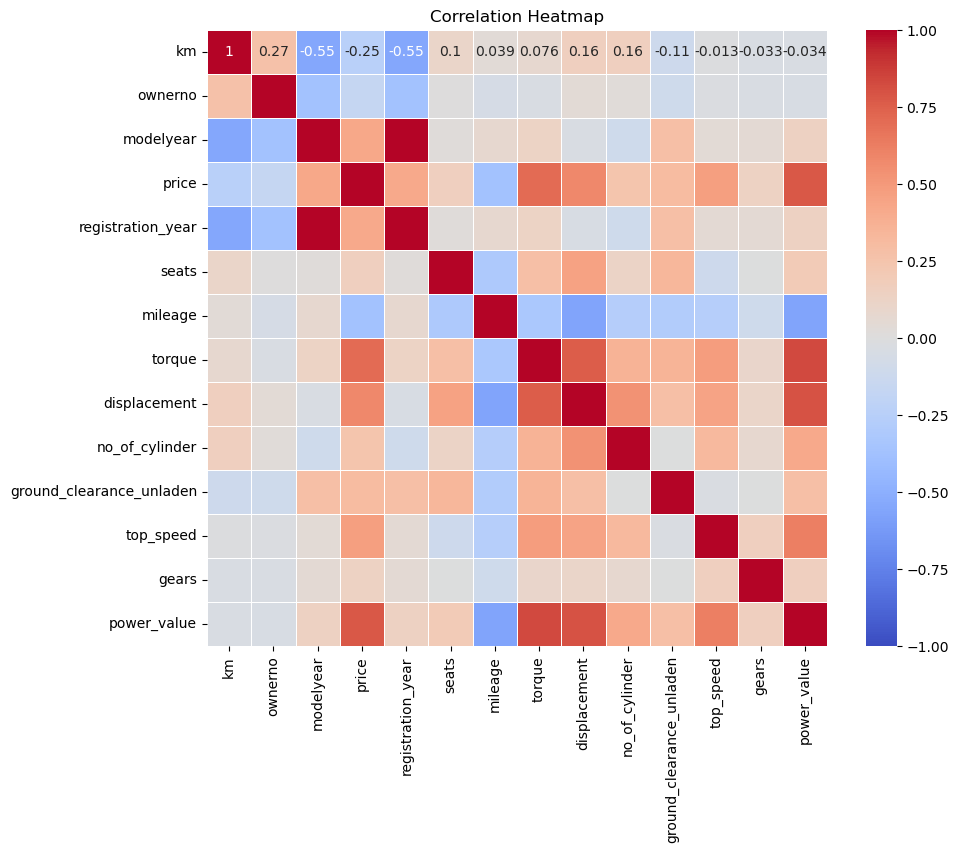

Correlation with 'price':
km                         -0.249428
ownerno                    -0.171624
modelyear                   0.423145
price                       1.000000
registration_year           0.420129
seats                       0.162741
mileage                    -0.374452
torque                      0.705716
displacement                0.578877
no_of_cylinder              0.244744
ground_clearance_unladen    0.305824
top_speed                   0.475759
gears                       0.135147
power_value                 0.775983
Name: price, dtype: float64


In [156]:
# heatmap for numerical columns

numeric_df = df_data_zscore_outlier.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Extract the correlation with 'price'
correlation_with_price = correlation_matrix['price']

# Print the correlation matrix with 'price'
print("Correlation with 'price':")
print(correlation_with_price)

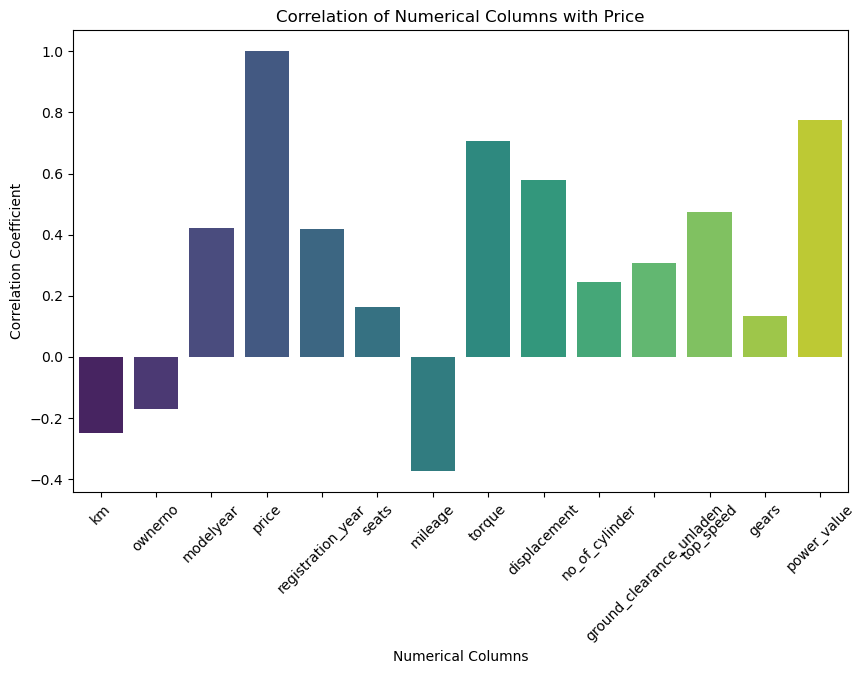

In [157]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='viridis')
plt.title('Correlation of Numerical Columns with Price')
plt.xlabel('Numerical Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [159]:
df_data_zscore_outlier.drop(['seats','no_of_cylinder','ownerno','mileage'],axis=1, inplace=True)
df_data_zscore_outlier.head(1)

,ft,bt,km,transmission,oem,model,modelyear,variantname,price,registration_year,insurance_validity,child_safety_locks,power_windows_rear,remote_trunk_opener,driver_air_bag,passenger_air_bag,ebd,rear_camera,no_of_airbags,vehicle_stability_control_system,cruise_control,sun_roof,hill_assist,side_air_bag_front,side_air_bag_rear,knee_airbags,eletronic_stability_control,torque,engine_type,displacement,value_configuration,fuel_suppy_system,turbo_charger,super_charger,drive_type,steering_type,ground_clearance_unladen,top_speed,city,gears,power_value,color_group
0,petrol,hatchback,120000,manual,maruti,maruti celerio,2015,vxi,400000.0,2015,third party,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,90.0,k10b engine,998,dohc,mpfi,no,no,fwd,power,165,150.0,bangalore,5,67.04,White


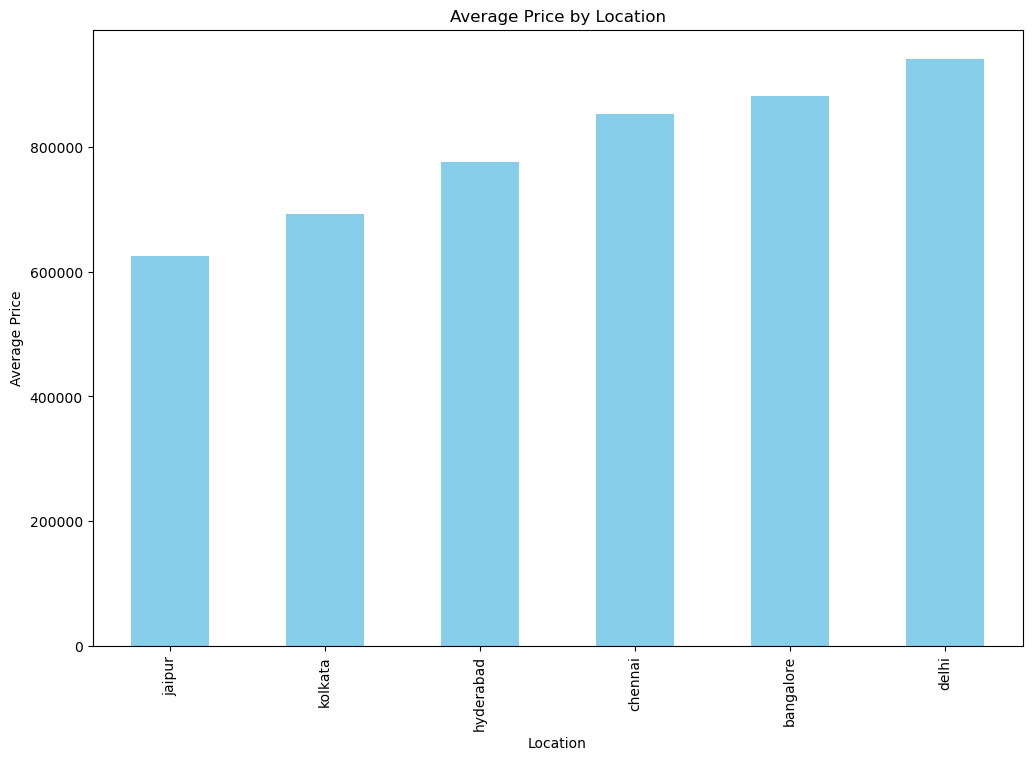

In [160]:
plt.figure(figsize=(12, 8))
average_prices = df_data_zscore_outlier.groupby('city')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.show()

In [161]:
df_data_zscore_outlier['color_group'].value_counts()

color_group
Other     2200
White     1570
Silver    1265
Red        810
Gray       623
Blue       579
Black      381
Brown      278
Orange     101
Gold        57
Green       42
Yellow      19
Purple      14
Bronze       5
Name: count, dtype: int64

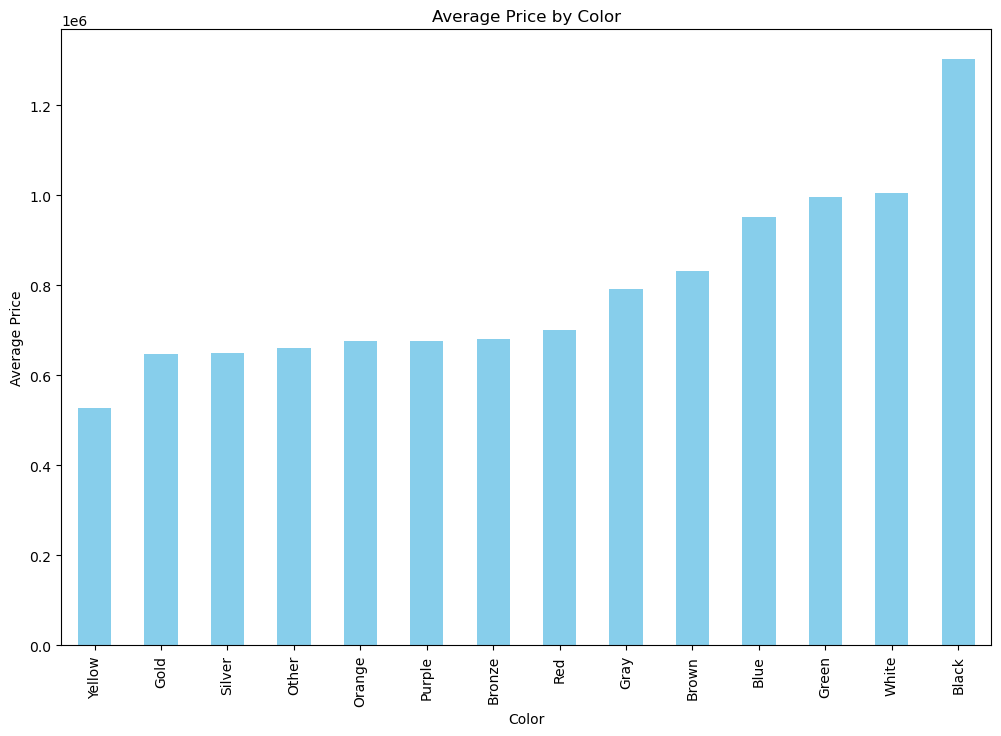

In [162]:
plt.figure(figsize=(12, 8))
average_prices = df_data_zscore_outlier.groupby('color_group')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()

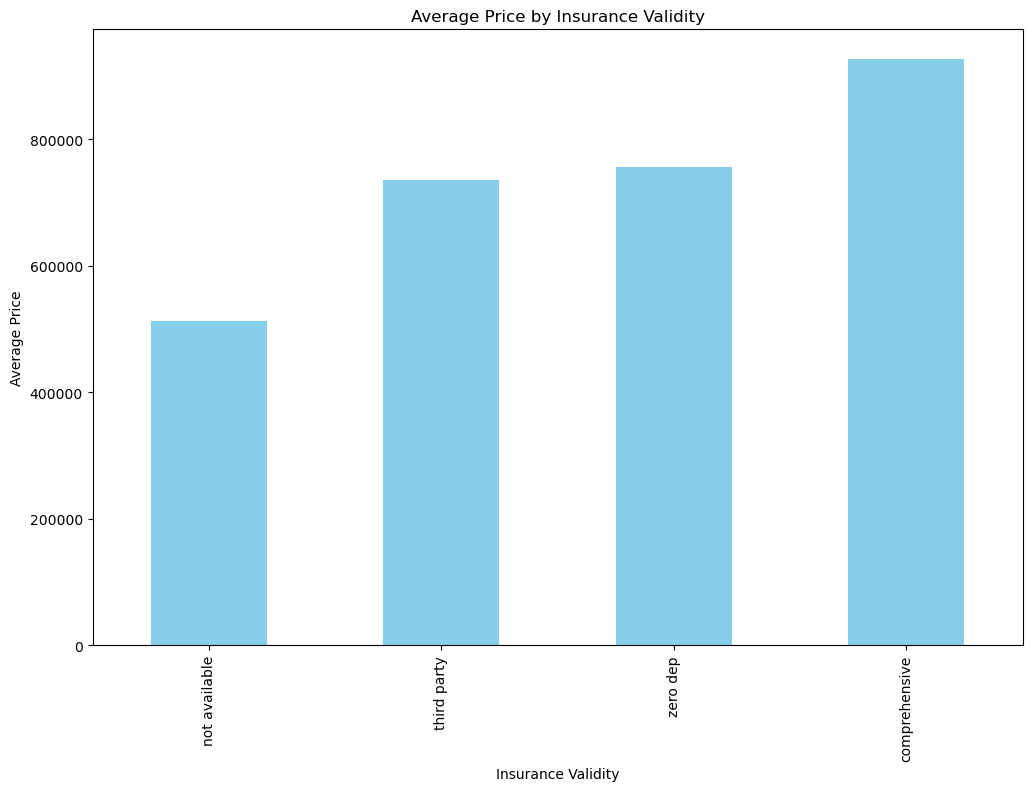

In [163]:
plt.figure(figsize=(12, 8))
average_prices = df_data_zscore_outlier.groupby('insurance_validity')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Insurance Validity')
plt.xlabel('Insurance Validity')
plt.ylabel('Average Price')
plt.show()

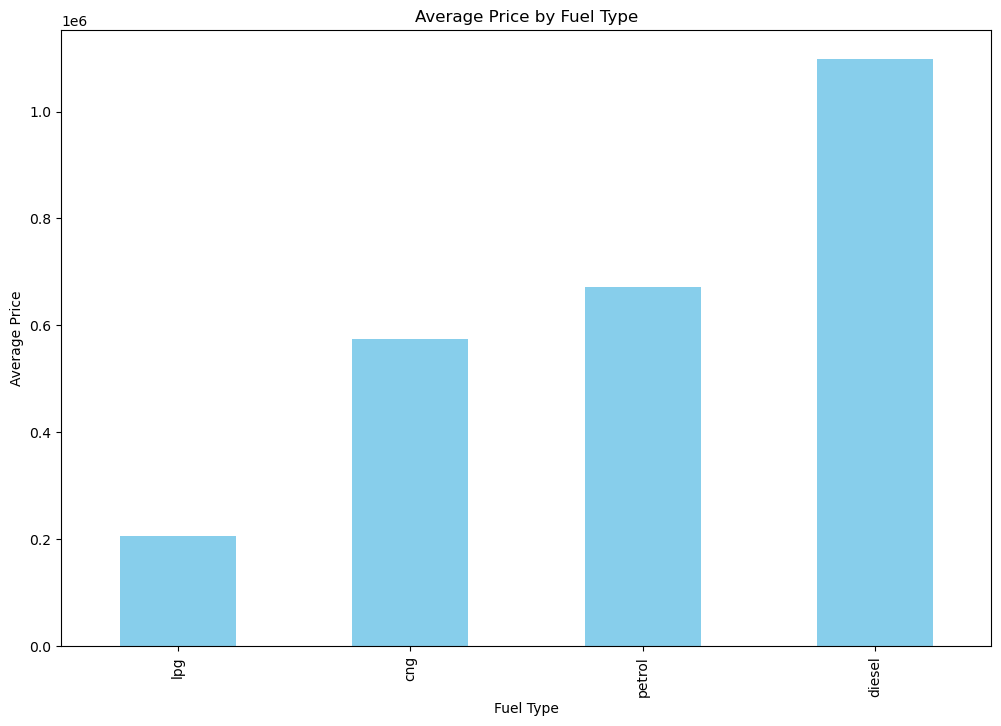

In [164]:
plt.figure(figsize=(12, 8))
average_prices = df_data_zscore_outlier.groupby('ft')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

In [165]:
#combining cng and lpg to gas 
df_data_zscore_outlier['ft']= df_data_zscore_outlier['ft'].replace('Cng','Gas')
df_data_zscore_outlier['ft']= df_data_zscore_outlier['ft'].replace('Lpg','Gas')

#dropping bt 
df_data_zscore_outlier.drop(['bt'], axis=1,inplace=True)

In [166]:
df_data_zscore_outlier.drop(['variantname'], axis=1,inplace=True)

In [167]:
freq_oem = df_data_zscore_outlier['oem'].value_counts()
freq_model = df_data_zscore_outlier['model'].value_counts()

# Define threshold
threshold = len(df_data_zscore_outlier) * 0.005

# Identify categories to keep and filter 
categories_to_keep_oem = freq_oem[freq_oem >= threshold].index
df_data_zscore_outlier = df_data_zscore_outlier[df_data_zscore_outlier['oem'].isin(categories_to_keep_oem)]

categories_to_keep_model= freq_model[freq_model >= threshold].index
df_data_zscore_outlier = df_data_zscore_outlier[df_data_zscore_outlier['model'].isin(categories_to_keep_model)]

df_data_zscore_outlier.shape

(5885, 40)

In [169]:
print(df_data_zscore_outlier['turbo_charger'].value_counts())
print(df_data_zscore_outlier['turbo_charger'].unique())
print(df_data_zscore_outlier['turbo_charger'].nunique())
print(df_data_zscore_outlier['turbo_charger'].isna().sum())
print('\n',df_data_zscore_outlier['super_charger'].value_counts())
print(df_data_zscore_outlier['super_charger'].unique())
print(df_data_zscore_outlier['super_charger'].nunique())
print(df_data_zscore_outlier['super_charger'].isna().sum())

turbo_charger
no     4252
yes    1633
Name: count, dtype: int64
['no' 'yes']
2
0

 super_charger
no    5885
Name: count, dtype: int64
['no']
1
0


In [170]:
##Can drop Super Charger as there is huge discrepenc
df_data_zscore_outlier.drop('super_charger',axis=1,inplace= True)

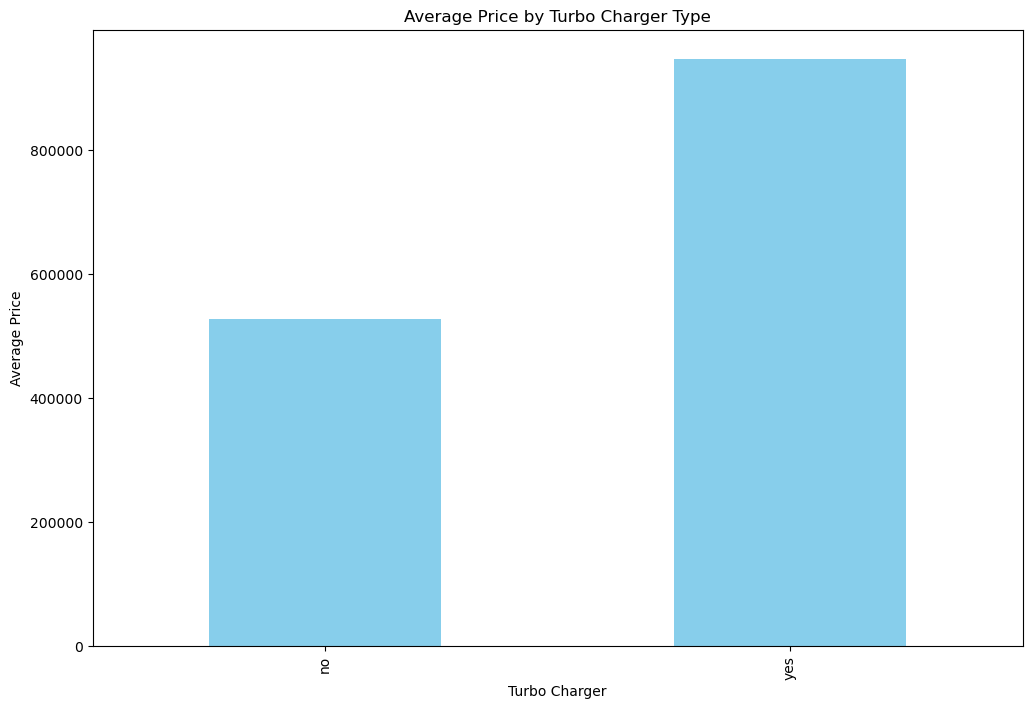

In [172]:
plt.figure(figsize=(12, 8))
average_prices = df_data_zscore_outlier.groupby('turbo_charger')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Turbo Charger Type')
plt.xlabel('Turbo Charger')
plt.ylabel('Average Price')
plt.show()

In [173]:
df_data_zscore_outlier.drop('gears',axis=1,inplace= True)

In [174]:
## can drop this too since Power is extremely manjor among them
df_data_zscore_outlier.drop('steering_type',axis=1,inplace= True)

In [176]:
df_data_zscore_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5885 entries, 0 to 8368
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ft                                5885 non-null   object 
 1   km                                5885 non-null   int64  
 2   transmission                      5885 non-null   object 
 3   oem                               5885 non-null   object 
 4   model                             5885 non-null   object 
 5   modelyear                         5885 non-null   int64  
 6   price                             5885 non-null   float64
 7   registration_year                 5885 non-null   int64  
 8   insurance_validity                5885 non-null   object 
 9   child_safety_locks                5885 non-null   bool   
 10  power_windows_rear                5885 non-null   bool   
 11  remote_trunk_opener               5885 non-null   bool   
 12  driver_air_

In [177]:
df_data_zscore_outlier.drop(['power_windows_rear','remote_trunk_opener','ebd','vehicle_stability_control_system','cruise_control','sun_roof','hill_assist','side_air_bag_front','side_air_bag_rear','knee_airbags','eletronic_stability_control','engine_type','value_configuration','fuel_suppy_system','drive_type','ground_clearance_unladen','power_value'],axis=1,inplace= True)

In [180]:
df_data_zscore_outlier.head()

,ft,km,transmission,oem,model,modelyear,price,registration_year,insurance_validity,child_safety_locks,driver_air_bag,passenger_air_bag,rear_camera,no_of_airbags,torque,displacement,turbo_charger,top_speed,city,color_group
0,petrol,120000,manual,maruti,maruti celerio,2015,400000.0,2015,third party,True,False,False,False,False,90.00,998,no,150.000000,bangalore,White
1,petrol,32706,manual,ford,ford ecosport,2018,811000.0,2018,comprehensive,True,True,True,True,True,150.00,1497,no,160.753469,bangalore,White
2,petrol,11949,manual,tata,tata tiago,2018,585000.0,2018,comprehensive,True,True,True,False,False,114.00,1199,no,150.000000,bangalore,Red
3,petrol,17794,manual,hyundai,hyundai xcent,2014,462000.0,2014,comprehensive,True,False,False,False,False,113.75,1197,no,172.000000,bangalore,Other
5,diesel,20000,manual,jeep,jeep compass,2020,1900000.0,2020,third party,True,True,True,False,True,350.00,1956,yes,190.000000,bangalore,Other


In [181]:
df_data_zscore_outlier.to_excel('all_processed_data.xlsx', index=False)